In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_venn as mv
import squarify

## Cargar datasets

In [10]:
#Box1 database
box = pd.read_csv('box1_proteins.csv')

In [2]:
box1_snv = pd.read_csv('datasets/clinvar_box1_snv.csv')
box1_del = pd.read_csv('datasets/clinvar_box1_del.csv')
box1_dup = pd.read_csv('datasets/clinvar_box1_dup.csv')
box1_micro = pd.read_csv('datasets/clinvar_box1_micro.csv')

In [11]:
complete = pd.concat([box1_snv, box1_del, box1_dup, box1_micro])
complete

,uniprot,organism,mlo,hgnc_id,length,sequence,geneid,genesymbol,snpid,alleleid,...,cambio,aa1,pos,aa2,ctrl,variant,pos1,pos2,aa,aa3
0,O15527,Homo sapiens,nuclear speckle,HGNC:8125,345,MPARALLPRRMGHRTLASTPALWASIPCPRSELRLDLVLPSGQSFR...,4968.0,OGG1,1.048938e+08,22641.0,...,(p.Arg46Gln),R,46.0,Q,True,NaN,NaN,NaN,NaN,NaN
1,O43663,Homo sapiens,pcg body,HGNC:9341,620,MRRSEVLAEESIVCLQKALNHLREIWELIGIPEDQRLQRTEVVKKH...,9055.0,PRC1,1.291119e+07,167492.0,...,(p.Tyr511Cys),Y,511.0,C,True,NaN,NaN,NaN,NaN,NaN
2,O95613,Homo sapiens,centrosome/spindle pole body,HGNC:16068,3336,MEVEQEQRRRKVEAGRTKLAHFRQRKTKGDSSHSEKKTAKRKGSAV...,5116.0,PCNT,1.194791e+08,19742.0,...,(p.Glu220Ter),E,220.0,*,True,NaN,NaN,NaN,NaN,NaN
3,O95613,Homo sapiens,centrosome/spindle pole body,HGNC:16068,3336,MEVEQEQRRRKVEAGRTKLAHFRQRKTKGDSSHSEKKTAKRKGSAV...,5116.0,PCNT,1.194791e+08,19745.0,...,(p.Arg1923Ter),R,1923.0,*,True,NaN,NaN,NaN,NaN,NaN
4,O95613,Homo sapiens,centrosome/spindle pole body,HGNC:16068,3336,MEVEQEQRRRKVEAGRTKLAHFRQRKTKGDSSHSEKKTAKRKGSAV...,5116.0,PCNT,1.194791e+08,19747.0,...,(p.Glu1037Ter),E,1037.0,*,True,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,P04156,Homo sapiens,cytoplasmic protein granule,HGNC:9449,253,MANLGCWMLVLFVATWSDLGLCKKRPKPGGWNTGGSRYPGQGSPGG...,5621.0,PRNP,1.939229e+08,76402.0,...,(p.Pro84_Gln91del),Pro,NaN,Gln,NaN,NaN,84.0,91.0,"['Pro', 'Gln']",NaN
666,P04156,Homo sapiens,cytoplasmic protein granule,HGNC:9449,253,MANLGCWMLVLFVATWSDLGLCKKRPKPGGWNTGGSRYPGQGSPGG...,5621.0,PRNP,5.706831e+08,351108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN
667,P23771,Homo sapiens,enhanceosome,HGNC:4172,443,MEVTADQPRWVSHHHPAVLNGQHPDTHHPGLSHSYMDAAQYPLPEE...,2625.0,GATA3,1.588392e+09,805651.0,...,(p.His380fs),His,NaN,NaN,NaN,NaN,380.0,NaN,['His'],NaN
668,Q15233,Homo sapiens,paraspeckle,HGNC:7871,471,MQSNKTFNLEKQNHTPRKHHQHHHQQQHHQQQQQQPPPPPIPANGQ...,4841.0,NONO,7.511311e+08,446755.0,...,(p.Ala439dup),Ala,NaN,NaN,NaN,NaN,439.0,NaN,['Ala'],NaN


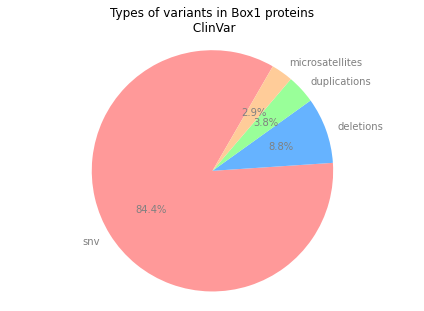

In [8]:
# Pie chart
labels = ['snv', 'deletions', 'duplications', 'microsatellites']
sizes = [len(box1_snv), len(box1_del), len(box1_dup), len(box1_micro)]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=60)
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Types of variants in Box1 proteins\n ClinVar')
plt.show()

In [18]:
complete.origin.value_counts()

germline            21443
unknown               563
somatic               364
germline/somatic      286
not provided          263
not applicable         12
Name: origin, dtype: int64

In [15]:
[i for i in complete.origin.value_counts()]

[21443, 563, 364, 286, 263, 12]

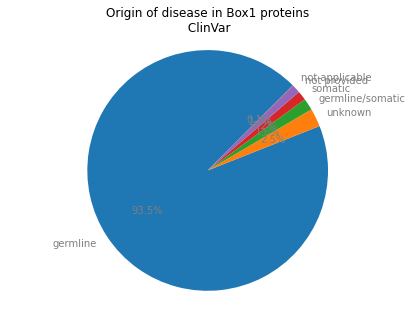

In [21]:
# Pie chart
labels = ['germline', 'unknown', 'germline/somatic', 'somatic', 'not provided', 'not applicable']
sizes = [i for i in complete.origin.value_counts()]
#colors
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=45)
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title('Origin of disease in Box1 proteins\n ClinVar')
plt.show()

In [9]:
mv.venn2_unweighted(subsets = (len(snvs), len(box), len(box_snvs.uniprot.unique())), set_labels = ('SNVs in ClinVar', 'Box 1'), alpha= 0.4)

NameError: name 'snvs' is not defined

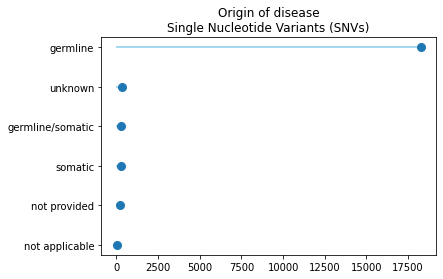

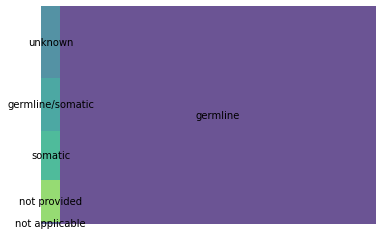

In [8]:
# grafico de origin of disease
origin= box1_snv.origin.value_counts().iloc[::-1]
my_range = range(1, len(origin)+1)

plt.hlines(y=my_range, xmin=0, xmax=origin,
           color='skyblue')
plt.plot(origin.tolist(), my_range, 'o', markersize=8)
plt.yticks(ticks= my_range, labels=origin.keys())
plt.title('Origin of disease\nSingle Nucleotide Variants (SNVs)')
plt.show()

squarify.plot(sizes=origin, label=origin.keys(), alpha=.8)
plt.axis('off')
plt.show()


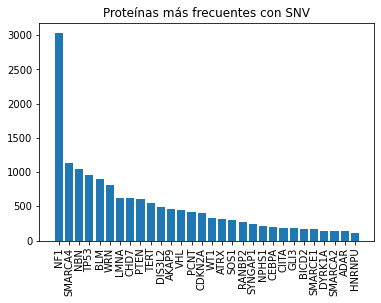

In [5]:
# gráfico de proteinas con más variantes
frec = box1_snv.genesymbol.value_counts()
frec1= frec[frec >= 100]

plt.bar(x = frec1.index, height=frec1)
plt.xticks(rotation=90)
plt.title('Proteínas más frecuentes con SNV')
plt.show()

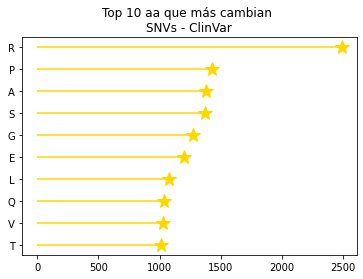

In [10]:
# aa con mas cambios
a = (box1_snv.aa1.value_counts()[0:10]).iloc[::-1]

plt.hlines(y=range(1, 11), xmin=0, xmax=a,
            color='gold')
plt.plot(a.tolist(), range(1, 11), '*', markersize=15, color='gold')
plt.yticks(ticks=range(1, 11), labels= a.keys())
plt.title('Top 10 aa que más cambian \nSNVs - ClinVar')
plt.show()


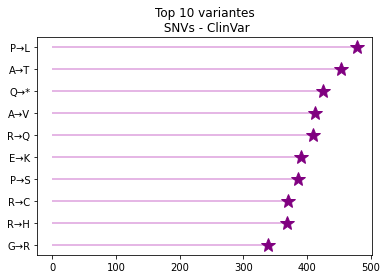

In [12]:
# Top variantes
cambios = ((box1_snv.aa1[:] + "→" + box1_snv.aa2[:]).value_counts()[0:10]).iloc[::-1]
plt.hlines(y=range(1,11), xmin=0, xmax=cambios, color='plum')
plt.plot(cambios.tolist(), range(1,11), '*', markersize=15, color='purple')
plt.yticks(ticks=range(1,11), labels=cambios.keys())
plt.title('Top 10 variantes\n SNVs - ClinVar')
plt.show()


In [ ]:
((pfam.uniprot.value_counts()[0:10]).iloc[::-1])

In [ ]:
# Top dominios pfam
top_dom= (pfam.pfam_domain.value_counts().iloc[::-1])
top_dom = top_dom[top_dom >=100]

plt.bar(x = top_dom.index, height=top_dom, color='lightblue', edgecolor='black')
plt.xticks(rotation=90)
plt.title('Dominios PFAM más frecuentes\n SNV ClinVar')
plt.show()